In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9cf008190b8346b68219c51175d93784 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EJ5syoN0wbMSMq6sjN8YaqMUwHzqAkdAcAZb1OIr2VlQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9cf008190b8346b68219c51175d93784.get_object(Bucket='datascience-donotdelete-pr-fhndrvbwcdnpan',Key='COVID19 cases_oct 8.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,219395,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,219396,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,219397,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,219398,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,219399,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [2]:
missing_data=df_data_1.isnull()
print(missing_data)

         _id  Assigned_ID  Outbreak Associated  Age Group  Neighbourhood Name  \
0      False        False                False      False               False   
1      False        False                False      False               False   
2      False        False                False      False               False   
3      False        False                False      False               False   
4      False        False                False      False               False   
5      False        False                False      False               False   
6      False        False                False      False               False   
7      False        False                False      False               False   
8      False        False                False      False               False   
9      False        False                False      False               False   
10     False        False                False      False               False   
11     False        False   

In [3]:
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")
    

_id
False    21142
Name: _id, dtype: int64

Assigned_ID
False    21142
Name: Assigned_ID, dtype: int64

Outbreak Associated
False    21142
Name: Outbreak Associated, dtype: int64

Age Group
False    21109
True        33
Name: Age Group, dtype: int64

Neighbourhood Name
False    20421
True       721
Name: Neighbourhood Name, dtype: int64

FSA
False    20510
True       632
Name: FSA, dtype: int64

Source of Infection
False    21142
Name: Source of Infection, dtype: int64

Classification
False    21142
Name: Classification, dtype: int64

Episode Date
False    21142
Name: Episode Date, dtype: int64

Reported Date
False    21142
Name: Reported Date, dtype: int64

Client Gender
False    21142
Name: Client Gender, dtype: int64

Outcome
False    21142
Name: Outcome, dtype: int64

Currently Hospitalized
False    21142
Name: Currently Hospitalized, dtype: int64

Currently in ICU
False    21142
Name: Currently in ICU, dtype: int64

Currently Intubated
False    21142
Name: Currently Intubated, dty

In [4]:
df_data_1.dropna(subset=["FSA","Neighbourhood Name","Age Group"],axis=0,inplace=True)

In [5]:
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

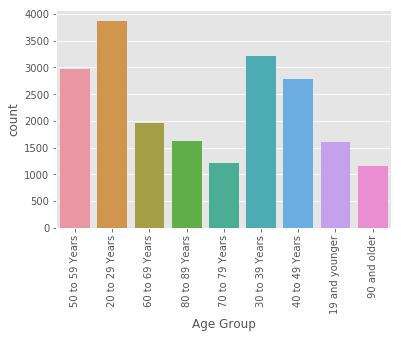

In [6]:
sns.countplot(x="Age Group",data=df_data_1)
plt.xticks(rotation=90)

In [7]:
df=df_data_1[["Age Group","Outcome"]]
df["Total"]=0
#print(df.head())
df_grp=df.groupby(["Age Group","Outcome"],as_index=False).count()
#df_grp.head(200)
#df_grp.plot(kind="bar")
#plt.xlabel("Age Group")
#plt.ylabel("Number  of Cases")
#plt.xticks(rotation=90)
#plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


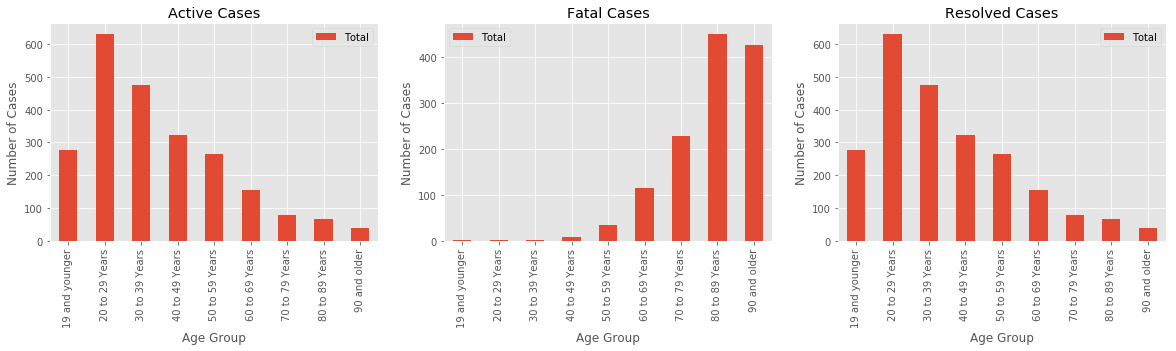

,Outcome,Total
Age Group,,
19 and younger,ACTIVE,278
20 to 29 Years,ACTIVE,632
30 to 39 Years,ACTIVE,475
40 to 49 Years,ACTIVE,324
50 to 59 Years,ACTIVE,263
60 to 69 Years,ACTIVE,154
70 to 79 Years,ACTIVE,78
80 to 89 Years,ACTIVE,66
90 and older,ACTIVE,38


In [8]:
df_grp_active=df_grp[df_grp["Outcome"]=="ACTIVE"]
df_grp_active=df_grp_active.set_index("Age Group")
df_grp_fatal=df_grp[df_grp["Outcome"]=="FATAL"]
df_grp_fatal=df_grp_fatal.set_index("Age Group")
df_grp_resolved=df_grp[df_grp["Outcome"]=="RESOLVED"]
df_grp_resolved=df_grp_resolved.set_index("Age Group")


fig=plt.figure()
ax0=fig.add_subplot(1,3,1)
ax1=fig.add_subplot(1,3,2)
ax2=fig.add_subplot(1,3,3)

df_grp_active.plot(kind="bar",figsize=(20,4),ax=ax0)
ax0.set_title("Active Cases")
ax0.set_xlabel("Age Group")
ax0.set_ylabel("Number of Cases")


df_grp_fatal.plot(kind="bar",figsize=(20,4),ax=ax1)
ax1.set_title("Fatal Cases")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Number of Cases")


df_grp_active.plot(kind="bar",figsize=(20,4),ax=ax2)
ax2.set_title("Resolved Cases")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Number of Cases")

plt.show()
df_grp_active.head(20)

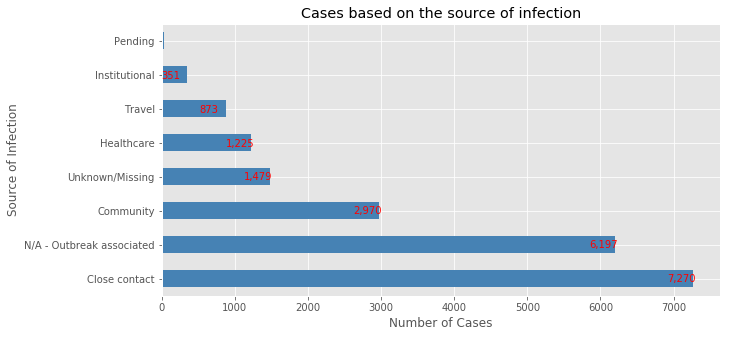

In [9]:
df_data_1.columns
#df_data_1['Neighbourhood Name'].value_counts()
#df_data_1['Source of Infection'].value_counts()
dfsrc=df_data_1['Source of Infection'].value_counts()
dfsrc.plot(kind='barh',figsize=(10,5),color="steelblue")
plt.ylabel("Source of Infection")
plt.xlabel("Number of Cases")
plt.title("Cases based on the source of infection")
for index,value in enumerate(dfsrc):
    label=format(int(value),',')
    plt.annotate(label,xy=(value-355,index-0.1),color='red')
plt.show()
#dfsrc

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


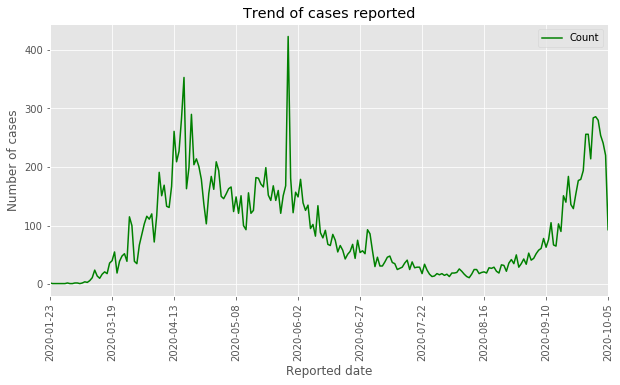

Index(['Reported Date', 'Count'], dtype='object')

In [10]:
#df_data_1.columns
import datetime

#Create DF with reported date only
dfrdate=df_data_1[['Reported Date']]
# Assign a new column count and initialize all values to 0
dfrdate['Count']=0
#Group by reported date to get the count
dfrdate1=dfrdate.groupby("Reported Date",as_index=False).count()
#change the dtype of date from int to datetime
#dfrdate1['datep']=pd.to_datetime(dfrdate1['Reported Date'],format="%Y-%m-%d")
#dfrdate1.drop("Reported Date",axis=1,inplace=True)
#dfrdate1.dtypes
dfrdate1.plot(kind="line",figsize=(10,5),x="Reported Date",color="Green")
plt.title("Trend of cases reported")
plt.xlabel("Reported date")
plt.xticks(rotation=90)
plt.ylabel("Number of cases")
plt.show()
dfrdate.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


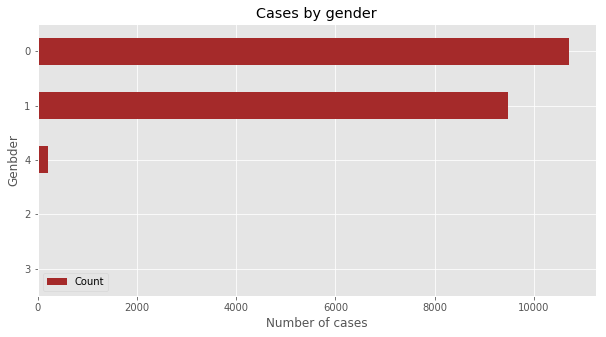

In [11]:
dfgen=df_data_1[['Client Gender']]
dfgen['Count']=0
dfgen1=dfgen.groupby("Client Gender",as_index=False).count()
dfgen2=dfgen1.sort_values(by="Count",axis=0,ascending=True)
dfgen2.plot(kind="barh",figsize=(10,5),color="brown")
plt.xlabel("Number of cases")
plt.ylabel("Genbder")
plt.title("Cases by gender")
plt.show()
